In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/drive/My Drive/train.csv")

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29


In [ ]:
data.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,18590.000000,18590.000000,18590.000000,18590.000000
mean,2.179398,4.486552,5.732173,0.452444
std,1.133148,2.044848,1.920547,0.197848
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.320000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
data['year'] = pd.DatetimeIndex(data['Date of Joining']).year
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,year
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,2008
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,2008
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,2008
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,2008
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29,2008


In [ ]:
gender_num = {'Male': 1, 'Female':0}

data['Gender'] = data['Gender'].map(gender_num)

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,year
0,fffe32003000360033003200,2008-09-30,0,Service,No,2.0,3.0,3.8,0.16,2008
1,fffe3700360033003500,2008-11-30,1,Service,Yes,1.0,2.0,5.0,0.36,2008
3,fffe32003400380032003900,2008-11-03,1,Service,Yes,1.0,1.0,2.6,0.20,2008
4,fffe31003900340031003600,2008-07-24,0,Service,No,3.0,7.0,6.9,0.52,2008
5,fffe3300350037003500,2008-11-26,1,Product,Yes,2.0,4.0,3.6,0.29,2008


In [ ]:
com = {'Service': 1, 'Product':0}

data['Company Type'] = data['Company Type'].map(com)

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,year
0,fffe32003000360033003200,2008-09-30,0,1,No,2.0,3.0,3.8,0.16,2008
1,fffe3700360033003500,2008-11-30,1,1,Yes,1.0,2.0,5.0,0.36,2008
3,fffe32003400380032003900,2008-11-03,1,1,Yes,1.0,1.0,2.6,0.20,2008
4,fffe31003900340031003600,2008-07-24,0,1,No,3.0,7.0,6.9,0.52,2008
5,fffe3300350037003500,2008-11-26,1,0,Yes,2.0,4.0,3.6,0.29,2008


In [ ]:

wfh = {'Yes': 1, 'No':0}

data['WFH Setup Available'] = data['WFH Setup Available'].map(wfh)

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,year
0,fffe32003000360033003200,2008-09-30,0,1,0,2.0,3.0,3.8,0.16,2008
1,fffe3700360033003500,2008-11-30,1,1,1,1.0,2.0,5.0,0.36,2008
3,fffe32003400380032003900,2008-11-03,1,1,1,1.0,1.0,2.6,0.20,2008
4,fffe31003900340031003600,2008-07-24,0,1,0,3.0,7.0,6.9,0.52,2008
5,fffe3300350037003500,2008-11-26,1,0,1,2.0,4.0,3.6,0.29,2008


In [ ]:
label=data["Burn Rate"]
features=data.drop(["Employee ID","Date of Joining","Burn Rate","year"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.4, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [ ]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(label), 2))

0.6
0.2
0.2


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
rf = RandomForestRegressor()

scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=5)

In [ ]:
scores

array([0.91039785, 0.9052672 , 0.90991376, 0.90872113, 0.91355317])

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestRegressor()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train,y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}



Feature: 0, Score: 0.03509
Feature: 1, Score: 0.96491


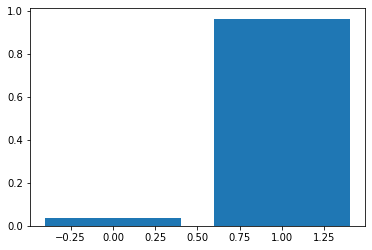

In [ ]:
rf.fit(X_train,y_train.values.ravel())
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
rf1 = RandomForestRegressor(n_estimators=5, max_depth=10)
rf1.fit(X_train,y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import r2_score
for mdl in [rf1]:
    y_pred = mdl.predict(X_val)
    score=r2_score(y_val,y_pred)
    print(score)

0.9187199524471925


In [ ]:
y_pred = rf1.predict(X_test)
score=r2_score(y_test,y_pred)
print(score)

0.9259578003364626


In [ ]:
test=pd.read_csv("/content/drive/My Drive/test.csv")

In [ ]:
gender_num = {'Male': 1, 'Female':0}

test['Gender'] = test['Gender'].map(gender_num)
com = {'Service': 1, 'Product':0}

test['Company Type'] = test['Company Type'].map(com)
wfh = {'Yes': 1, 'No':0}

test['WFH Setup Available'] = test['WFH Setup Available'].map(wfh)

In [ ]:
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,0,1,0,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,0,0,1,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,1,0,1,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,0,1,0,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,0,0,0,2.0,5.0,6.4


In [ ]:
test['year'] = pd.DatetimeIndex(test['Date of Joining']).year
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,year
0,fffe31003300390039003000,2008-12-10,0,1,0,2.0,5.0,7.7,2008
1,fffe31003300310037003800,2008-08-14,0,0,1,1.0,2.0,5.2,2008
2,fffe33003400380035003900,2008-11-13,1,0,1,1.0,3.0,5.9,2008
3,fffe3100370039003200,2008-02-07,0,1,0,3.0,6.0,4.6,2008
4,fffe32003600390036003700,2008-07-17,0,0,0,2.0,5.0,6.4,2008


In [ ]:

features=test.drop(["Employee ID","Date of Joining","Date of Joining","Gender","Company Type","WFH Setup Available","Designation","year"],axis=1)

In [ ]:
Burn_Rate=rf1.predict(features)

In [ ]:
pred_df = pd.DataFrame(Burn_Rate, index=test["Employee ID"], columns=["Burn Rate"])
pred_df.to_csv('sample.csv', header=True, index_label='Employee ID')